 <h1 style="background-color:#D7BDE2;font-family:newtimeroman;font-size:225%;text-align:center;border-radius: 15px 50px;"> 🏎️ F1 Championship Data Analysis & Machine Learning Predictions 🏎️</h1><a id=0></a>
<h3 style="text-align:center; font-family:newtimeroman;">✨ Author: <b>Parvash Choudhary Talluri</b> ✨</h3>

# Forumla 1

Formula One (also known as Formula 1 or F1) is the highest class of international racing for open-wheel single-seater formula racing cars sanctioned by the Fédération Internationale de l'Automobile (FIA). The World Drivers' Championship, which became the FIA Formula One World Championship in 1981, has been one of the premier forms of racing around the world since its inaugural season in 1950. The word formula in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix, which take place worldwide on both purpose-built circuits and closed public roads.

![forumla](https://wallpapercave.com/download/formula-1-logo-wallpapers-wp7514293)

Step 1: importing required libraries

In [1]:
# importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

# Importing the Data

In [2]:

import os
data_path = "../data/"
result_df = pd.read_csv(os.path.join(data_path, "results.csv"))
stats_df = pd.read_csv(os.path.join(data_path, "status.csv"))
drivers_df = pd.read_csv(os.path.join(data_path, "drivers.csv"))
races_df = pd.read_csv(os.path.join(data_path, "races.csv"))
constructor_df = pd.read_csv(os.path.join(data_path, "constructors.csv"))
driver_standings_df = pd.read_csv(os.path.join(data_path, "driver_standings.csv"))
pd.set_option("display.max_columns", None)



In [3]:
result_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
result_df.tail()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130
26079,26085,1110,857,1,81,5,\N,R,20,0.0,0,\N,\N,\N,0,\N,\N,130


In [5]:
stats_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [6]:
stats_df.tail()

,statusId,status
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray
138,141,Cooling system


In [7]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [8]:
drivers_df.tail()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant


In [9]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [10]:
races_df.tail()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N
1100,1120,2023,22,24,Abu Dhabi Grand Prix,2023-11-26,13:00:00,https://en.wikipedia.org/wiki/2023_Abu_Dhabi_G...,2023-11-24,09:30:00,2023-11-24,13:00:00,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N


In [11]:
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [12]:
constructor_df.tail()

,constructorId,constructorRef,name,nationality,url
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [13]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [14]:
driver_standings_df.tail()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0
34123,72187,1110,817,0.0,21,21,0


# Feature Engineering

In [15]:
races_df['raceId']

0          1
1          2
2          3
3          4
4          5
        ... 
1096    1116
1097    1117
1098    1118
1099    1119
1100    1120
Name: raceId, Length: 1101, dtype: int64

In [16]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


In [17]:
races_df.describe()

,raceId,year,round,circuitId
count,1101.000000,1101.000000,1101.000000,1101.000000
mean,553.355132,1992.020890,8.494096,23.700272
std,321.425790,20.296406,5.081089,19.346014
min,1.000000,1950.000000,1.000000,1.000000
25%,276.000000,1976.000000,4.000000,9.000000
50%,551.000000,1994.000000,8.000000,18.000000
75%,826.000000,2010.000000,12.000000,34.000000
max,1120.000000,2023.000000,22.000000,80.000000


In [18]:
races_df = races_df.raceId.astype(int)

In [19]:
races_df

0          1
1          2
2          3
3          4
4          5
        ... 
1096    1116
1097    1117
1098    1118
1099    1119
1100    1120
Name: raceId, Length: 1101, dtype: int64

In [20]:
# merging all seperate dataframe into single dataframe as df

con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [21]:
print(pd.get_option("display.max_columns"))

None


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537627 entries, 0 to 3537626
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time               object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  driverRef          object 
 19  number_y           object 
 20  code               object 
 21  forename           object 
 22  surname            object 
 23  dob                object 
 24  nationality_x      object 
 25  url_x             

In [23]:
# checking of null values

df.isna()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537622,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3537623,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3537624,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3537625,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Note:There's no null values in the dataset

In [24]:
# There's no null values in the dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537627 entries, 0 to 3537626
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time               object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  driverRef          object 
 19  number_y           object 
 20  code               object 
 21  forename           object 
 22  surname            object 
 23  dob                object 
 24  nationality_x      object 
 25  url_x             

# Describe
Describe function is used to show the statistical value of each column. which all include:

* Count of the column
* Mean value of the column
* Standard Deviation of the column
* Minimum value of the column
* 25% percentile of the column
* 50% percentile of the column
* 75% percentile of the column
* Maximum value of the column

In [26]:
# summary
df.describe()

,resultId,raceId_x,driverId,constructorId,grid,positionOrder,points_x,laps,statusId,driverStandingsId,raceId_y,points_y,position_y,wins
count,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06,3.537627e+06
mean,1.263009e+04,5.170666e+02,2.041828e+02,3.941215e+01,9.763203e+00,1.122956e+01,2.998598e+00,4.836204e+01,1.323813e+01,4.011746e+04,5.193302e+02,2.839100e+01,1.165484e+01,5.517376e-01
std,8.209508e+03,3.315362e+02,2.658523e+02,5.686047e+01,6.557031e+00,7.378775e+00,5.334331e+00,2.512323e+01,2.254451e+01,2.530927e+04,3.319626e+02,5.204755e+01,9.133026e+00,1.452231e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.125000e+03,2.340000e+02,2.000000e+01,6.000000e+00,4.000000e+00,5.000000e+00,0.000000e+00,3.200000e+01,1.000000e+00,1.385600e+04,2.380000e+02,1.000000e+00,5.000000e+00,0.000000e+00
50%,1.176300e+04,4.670000e+02,1.050000e+02,1.600000e+01,9.000000e+00,1.000000e+01,0.000000e+00,5.500000e+01,5.000000e+00,4.996000e+04,4.700000e+02,8.000000e+00,1.000000e+01,0.000000e+00
75%,2.114000e+04,8.560000e+02,2.290000e+02,3.700000e+01,1.500000e+01,1.700000e+01,4.000000e+00,6.700000e+01,1.200000e+01,6.582400e+04,8.570000e+02,3.100000e+01,1.600000e+01,0.000000e+00
max,2.608500e+04,1.110000e+03,8.580000e+02,2.140000e+02,3.400000e+01,3.900000e+01,5.000000e+01,2.000000e+02,1.410000e+02,7.218700e+04,1.110000e+03,4.540000e+02,1.080000e+02,1.500000e+01


In [27]:
df.head(20)

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
5,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,91,23,38.0,1,1,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
6,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,113,24,38.0,2,2,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
7,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,135,25,38.0,4,4,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
8,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,157,26,48.0,1,1,3,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
9,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,179,27,58.0,1,1,4,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [28]:
df = df.drop('position_x', axis=1)


In [29]:
df.head(10)

,resultId,raceId_x,driverId,constructorId,number_x,grid,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
5,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,91,23,38.0,1,1,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
6,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,113,24,38.0,2,2,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
7,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,135,25,38.0,4,4,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
8,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,157,26,48.0,1,1,3,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
9,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,179,27,58.0,1,1,4,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [30]:
# changing of old column name to meaningful name

col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_num,driver_code,forename,surname,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


![overtake](https://c.tenor.com/IB4EgSxeYREAAAAd/f1-max-verstappen.gif)

In [31]:
# Adding two column (forename,surname) to create a single column called driver_name

df['driver_name'] = df['forename']+' '+df['surname']

In [32]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_num,driver_code,forename,surname,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name
0,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
1,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
2,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
3,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
4,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton


In [33]:
df = df.drop(['forename','surname'], axis=1)

In [34]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_num,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name
0,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
1,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
2,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
3,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
4,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton


# Converting dtype

Changing of data type from object to date to calculate the driver's age.

In [35]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_num,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name
0,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
1,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
2,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
3,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
4,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton


In [36]:
# converting to date format from string

pd.to_datetime(df.dob)

0         1985-01-07
1         1985-01-07
2         1985-01-07
3         1985-01-07
4         1985-01-07
             ...    
3537622   2001-04-06
3537623   2001-04-06
3537624   2001-04-06
3537625   2001-04-06
3537626   2001-04-06
Name: dob, Length: 3537627, dtype: datetime64[ns]

In [37]:
df['dob'] = pd.to_datetime(df['dob'])

In [38]:
from datetime import datetime

In [39]:
# calculating driver's age and creating it as a new column

dates = datetime.today()-df['dob']
age = dates.dt.days/365

In [40]:
df['age'] = round(age)

In [41]:
pd.set_option('display.max_columns', None)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_num,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
0,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0


In [42]:
# changing datatype

l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [43]:
df.drop('driver_num', axis=1, inplace=True)

In [44]:
# seperating categorical and numerical columns for understading

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [45]:
df[cat].head()

,positionText_x,time,fastestLapTime,driverRef,driver_code,nationality,url_x,positionText_y,constructorRef,name,nationality_y,url_y,status,driver_name
0,1,1:34:50.616,1:27.452,hamilton,HAM,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
1,1,1:34:50.616,1:27.452,hamilton,HAM,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
2,1,1:34:50.616,1:27.452,hamilton,HAM,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,3,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
3,1,1:34:50.616,1:27.452,hamilton,HAM,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton
4,1,1:34:50.616,1:27.452,hamilton,HAM,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,3,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton


In [46]:
df[num].head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,dob,driverStandingsId,raceId_y,points_y,position,wins,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,1,18,10.0,1,1,40.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,9,19,14.0,1,1,40.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,27,20,14.0,3,1,40.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,48,21,20.0,2,1,40.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,69,22,28.0,3,1,40.0


In [47]:
df.dtypes

resultId                          int64
racerId                           int64
driverId                          int64
constructorId                     int64
number                          float64
grid                              int64
positionText_x                   object
positionOrder                     int64
points                          float64
laps                              int64
time                             object
timetaken_in_millisec           float64
fastestLap                      float64
rank                            float64
fastestLapTime                   object
max_speed                       float64
statusId                          int64
driverRef                        object
driver_code                      object
dob                      datetime64[ns]
nationality                      object
url_x                            object
driverStandingsId                 int64
raceId_y                          int64
points_y                        float64


In [48]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
0,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0


In [49]:
df.isnull().sum() / len(df) * 100

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.004523
grid                      0.000000
positionText_x            0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
time                      0.000000
timetaken_in_millisec    61.421936
fastestLap               60.511100
rank                     59.513764
fastestLapTime            0.000000
max_speed                60.511100
statusId                  0.000000
driverRef                 0.000000
driver_code               0.000000
dob                       0.000000
nationality               0.000000
url_x                     0.000000
driverStandingsId         0.000000
raceId_y                  0.000000
points_y                  0.000000
position                  0.000000
positionText_y            0.000000
wins                      0.000000
constructorRef      

In [50]:
df['max_speed'].mean()

np.float64(204.02159408791883)

In [51]:
df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [52]:
df.isnull().sum() / len(df) * 100

resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
number                   0.0
grid                     0.0
positionText_x           0.0
positionOrder            0.0
points                   0.0
laps                     0.0
time                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
rank                     0.0
fastestLapTime           0.0
max_speed                0.0
statusId                 0.0
driverRef                0.0
driver_code              0.0
dob                      0.0
nationality              0.0
url_x                    0.0
driverStandingsId        0.0
raceId_y                 0.0
points_y                 0.0
position                 0.0
positionText_y           0.0
wins                     0.0
constructorRef           0.0
name                     0.0
nationality_y            0.0
url_y                    0.0
status                   0.0
driver_name              0.0
age           

In [53]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
0,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0


In [54]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
resultId,3537627.0,12630.091396,1.0,5125.0,11763.0,21140.0,26085.0,8209.508032
racerId,3537627.0,517.06657,1.0,234.0,467.0,856.0,1110.0,331.536193
driverId,3537627.0,204.182795,1.0,20.0,105.0,229.0,858.0,265.852299
constructorId,3537627.0,39.412151,1.0,6.0,16.0,37.0,214.0,56.860468
number,3537627.0,15.419147,0.0,6.0,12.0,21.0,208.0,13.997266
grid,3537627.0,9.763203,0.0,4.0,9.0,15.0,34.0,6.557031
positionOrder,3537627.0,11.229562,1.0,5.0,10.0,17.0,39.0,7.378775
points,3537627.0,2.998598,0.0,0.0,0.0,4.0,50.0,5.334331
laps,3537627.0,48.36204,0.0,32.0,55.0,67.0,200.0,25.123229
timetaken_in_millisec,3537627.0,5955319.302289,207071.0,5955319.302289,5955319.302289,5955319.302289,15090540.0,760797.15779


# Map

The map is used to plot the track that are used all around the world using latitude and longitude.

In [55]:
circuit_df = pd.read_csv('C:\\Users\\tallu\\Desktop\\MLP\\F1_Data\\circuits.csv')
circuit_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


# displaying the f1 track on the map using folium

In [56]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [57]:
# ploting the f1 track using lat and lng in worldmap

import folium

coordinates=[]
for lat, lng in zip(circuit_df['lat'], circuit_df['lng']):
    coordinates.append([lat, lng])

maps = folium.Map(zoom_start=150)  # No custom tiles specified

for coord, name in zip(coordinates, circuit_df.name):
    marker = folium.Marker(
        location=coord,
        icon=folium.Icon(icon="car", color='cadetblue', prefix='fa'),
        popup="<strong>{0}</strong>".format(name)  # Strong tag is used to bold the font (optional)
    )
    maps.add_child(marker)

maps  # Display the map


In [58]:
df['rank'].unique()

array([ 2.,  3.,  5.,  7.,  1., 14., 12.,  4.,  9., 13., 15., 16.,  6.,
       11., 10., 17.,  0.,  8., 18., 19., 20., 21., 22., 23., 24.])

# Data Filtration

Filtering data by the driver who finished the race successfully

In [59]:
df_fin = df[df['status'] == 'Finished']
df_fin.tail()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
3537435,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72080,1106,6.0,13,13,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0
3537436,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72120,1107,9.0,12,12,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0
3537437,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72140,1108,9.0,14,14,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0
3537438,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72160,1109,9.0,14,14,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0
3537439,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72181,1110,9.0,14,14,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0


In [60]:
mean = df.max_speed.mean()
mean2 = df.fastestLap.mean()
df = df_fin[df_fin['max_speed']>mean]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
0,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0


In [61]:
df[df['fastestLap']>mean2]

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
0,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537435,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72080,1106,6.0,13,13,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0
3537436,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72120,1107,9.0,12,12,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0
3537437,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72140,1108,9.0,14,14,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0
3537438,26083,1110,807,210,27.0,0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1,hulkenberg,HUL,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,72160,1109,9.0,14,14,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Finished,Nico Hülkenberg,38.0


In [62]:
# filtering the data by mean of driver's age

df = df[df['age']<df['age'].mean()]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,driverRef,driver_code,dob,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
0,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished,Lewis Hamilton,40.0


In [63]:
# droping unwanted columns

df.drop('dob', axis=1, inplace=True)
df.drop('statusId', axis=1, inplace=True)


# Skewness

Checking for skewness in the data, Skewness is used to check the normality of the data by ranging from -1 to 1.
* -1 --> Left skewed
* 0 --> Normal distribution
* 1 --> Right skewed

In [64]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [65]:
import numpy as np
df.select_dtypes(include=[np.number]).skew()


resultId                -3.026836
racerId                 -2.453757
driverId                -0.267265
constructorId            0.790550
number                   1.060302
grid                     0.807495
positionOrder            0.741906
points                   0.398371
laps                     0.531663
timetaken_in_millisec    3.044219
fastestLap              -0.408342
rank                     0.731860
max_speed                0.580392
driverStandingsId       -3.121329
raceId_y                -2.279060
points_y                 1.398338
position                 0.732240
wins                     2.483947
age                     -0.853160
dtype: float64

# Outlier Treatment

Seems some columns are skewed a lot, removal of the outliers will normalize a data bit

In [66]:
# outlier removal
# Calculate quantiles and IQR only for numeric data
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Filtering using IQR only on numeric columns
filter = (df[Q1.index] < (Q1 - 1.5 * IQR)) | (df[Q3.index] > (Q3 + 1.5 * IQR))

# Apply filter to the DataFrame and drop rows with any True values
df = df[~filter.any(axis=1)]

df.head()


,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,driverRef,driver_code,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
2588356,20779,841,20,9,1.0,1,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,vettel,VET,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,68156,969,25.0,1,1,1,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,Sebastian Vettel,38.0
2588393,20779,841,20,9,1.0,1,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,vettel,VET,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,64384,842,50.0,1,1,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,Sebastian Vettel,38.0
2588394,20779,841,20,9,1.0,1,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,vettel,VET,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,64690,841,25.0,1,1,1,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,Sebastian Vettel,38.0
2588395,20779,841,20,9,1.0,1,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,vettel,VET,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,64408,843,68.0,1,1,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,Sebastian Vettel,38.0
2588412,20779,841,20,9,1.0,1,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,vettel,VET,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,64977,860,18.0,2,2,0,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,Sebastian Vettel,38.0


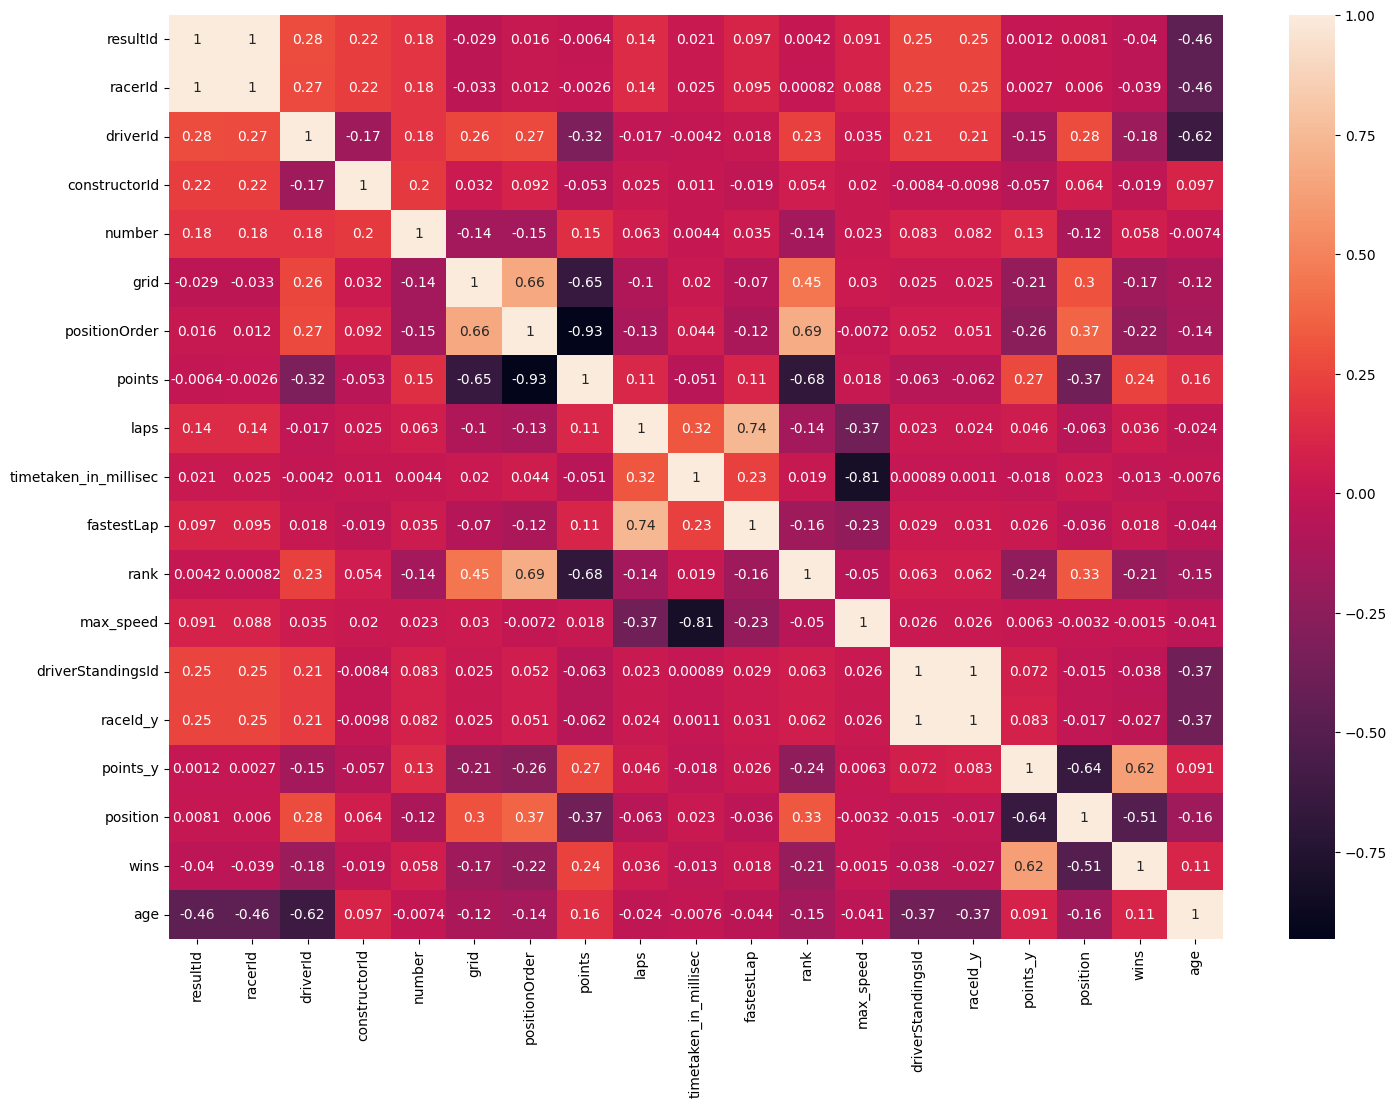

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric data types for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix and plot it
plt.figure(figsize=(17,12))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


In [68]:
num.remove('dob')
num.remove('statusId')

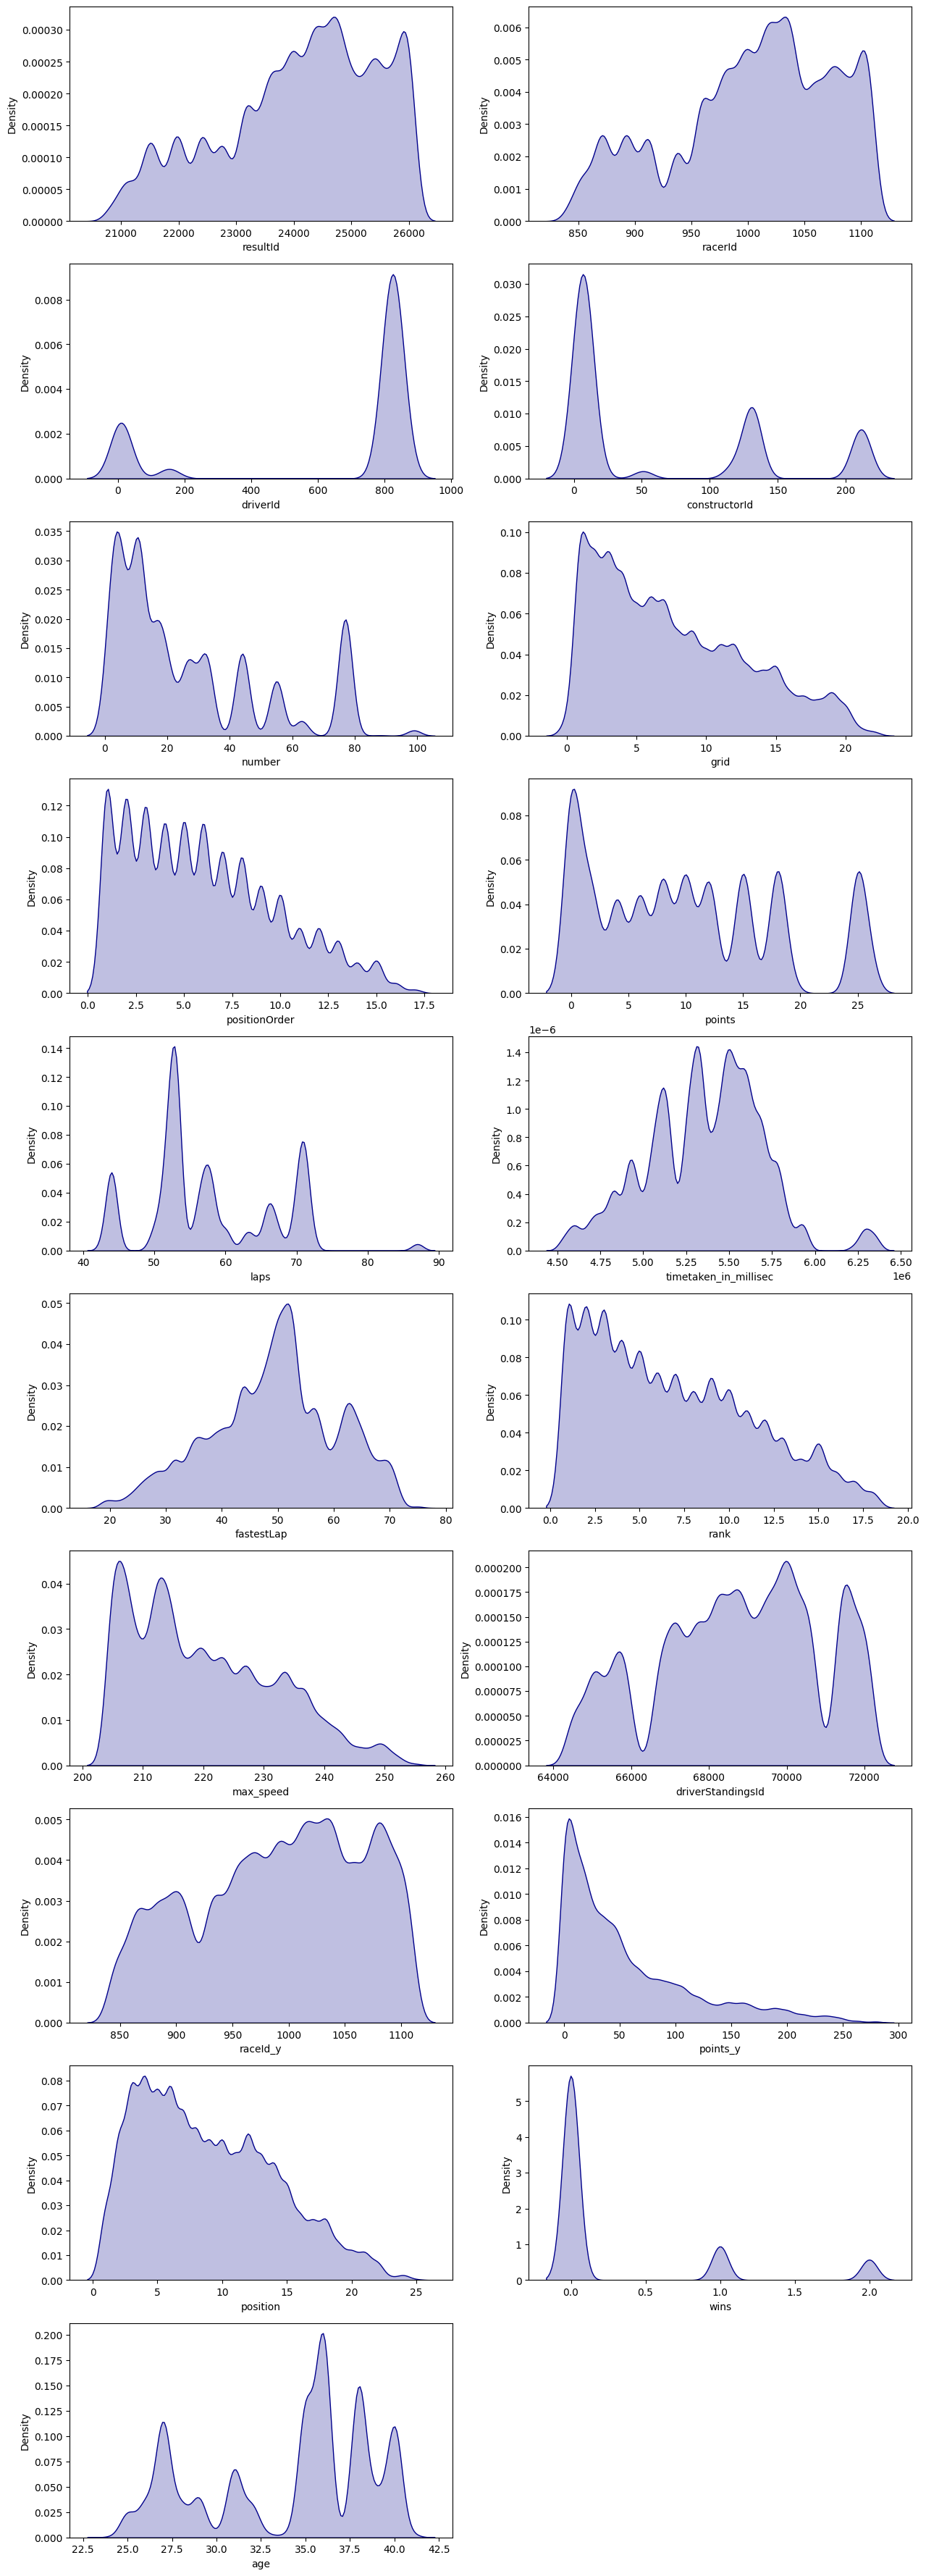

In [69]:
# kde plot for checking the normalization

plt.figure(figsize=(15,50))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

In [70]:
# Calculate skewness only for numeric columns
numeric_skew = df.select_dtypes(include=[np.number]).skew()
print(numeric_skew)


resultId                -0.517780
racerId                 -0.484099
driverId                -1.257853
constructorId            0.875725
number                   1.045962
grid                     0.638211
positionOrder            0.590085
points                   0.482293
laps                     0.508086
timetaken_in_millisec   -0.001155
fastestLap              -0.229813
rank                     0.538805
max_speed                0.582163
driverStandingsId       -0.261000
raceId_y                -0.269136
points_y                 1.366640
position                 0.525979
wins                     1.937723
age                     -0.530819
dtype: float64


Still some columns are skewed even after outlier removal and skewness can be normalized during ML part.

# Encoding

I have choosen LabelEncoding instead of one hot encoding, because one hot will give you a various new columns based on the unique value. I will recommend LabelEncoding to use always, since it will replace in a single column for new value.

Note:
    
    * To represent a unicode string as a string of bytes is known as encoding.
    * To convert a string of bytes to a unicode string is known as decoding.

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [72]:
# encoding categorical columns

for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,time,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,driverRef,driver_code,nationality,url_x,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,name,nationality_y,url_y,status,driver_name,age
2588356,20779,841,20,9,1.0,1,0,1,25.0,58,1018,5370259.0,44.0,4.0,515,212.488,45,44,11,39,68156,969,25.0,1,0,1,12,12,1,10,0,39,38.0
2588393,20779,841,20,9,1.0,1,0,1,25.0,58,1018,5370259.0,44.0,4.0,515,212.488,45,44,11,39,64384,842,50.0,1,0,2,12,12,1,10,0,39,38.0
2588394,20779,841,20,9,1.0,1,0,1,25.0,58,1018,5370259.0,44.0,4.0,515,212.488,45,44,11,39,64690,841,25.0,1,0,1,12,12,1,10,0,39,38.0
2588395,20779,841,20,9,1.0,1,0,1,25.0,58,1018,5370259.0,44.0,4.0,515,212.488,45,44,11,39,64408,843,68.0,1,0,2,12,12,1,10,0,39,38.0
2588412,20779,841,20,9,1.0,1,0,1,25.0,58,1018,5370259.0,44.0,4.0,515,212.488,45,44,11,39,64977,860,18.0,2,11,0,12,12,1,10,0,39,38.0


In [73]:
x = df.drop('driver_name', axis=1)
y = df['driver_name']


In [74]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

# ML Algorithms

In [75]:
# importing ML libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [76]:
clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [77]:
tree.export_text(clf)

'|--- feature_19 <= 42.50\n|   |--- feature_19 <= 40.50\n|   |   |--- feature_16 <= 44.50\n|   |   |   |--- feature_2 <= 2.00\n|   |   |   |   |--- class: 23\n|   |   |   |--- feature_2 >  2.00\n|   |   |   |   |--- feature_18 <= 1.50\n|   |   |   |   |   |--- class: 7\n|   |   |   |   |--- feature_18 >  1.50\n|   |   |   |   |   |--- class: 26\n|   |   |--- feature_16 >  44.50\n|   |   |   |--- class: 39\n|   |--- feature_19 >  40.50\n|   |   |--- feature_18 <= 8.00\n|   |   |   |--- class: 42\n|   |   |--- feature_18 >  8.00\n|   |   |   |--- class: 41\n|--- feature_19 >  42.50\n|   |--- feature_19 <= 43.50\n|   |   |--- class: 44\n|   |--- feature_19 >  43.50\n|   |   |--- feature_3 <= 132.00\n|   |   |   |--- feature_4 <= 17.00\n|   |   |   |   |--- class: 45\n|   |   |   |--- feature_4 >  17.00\n|   |   |   |   |--- class: 13\n|   |   |--- feature_3 >  132.00\n|   |   |   |--- class: 46\n'

In [78]:
fn = list(df.columns)
fn.remove('driver_name')

# DT workflow

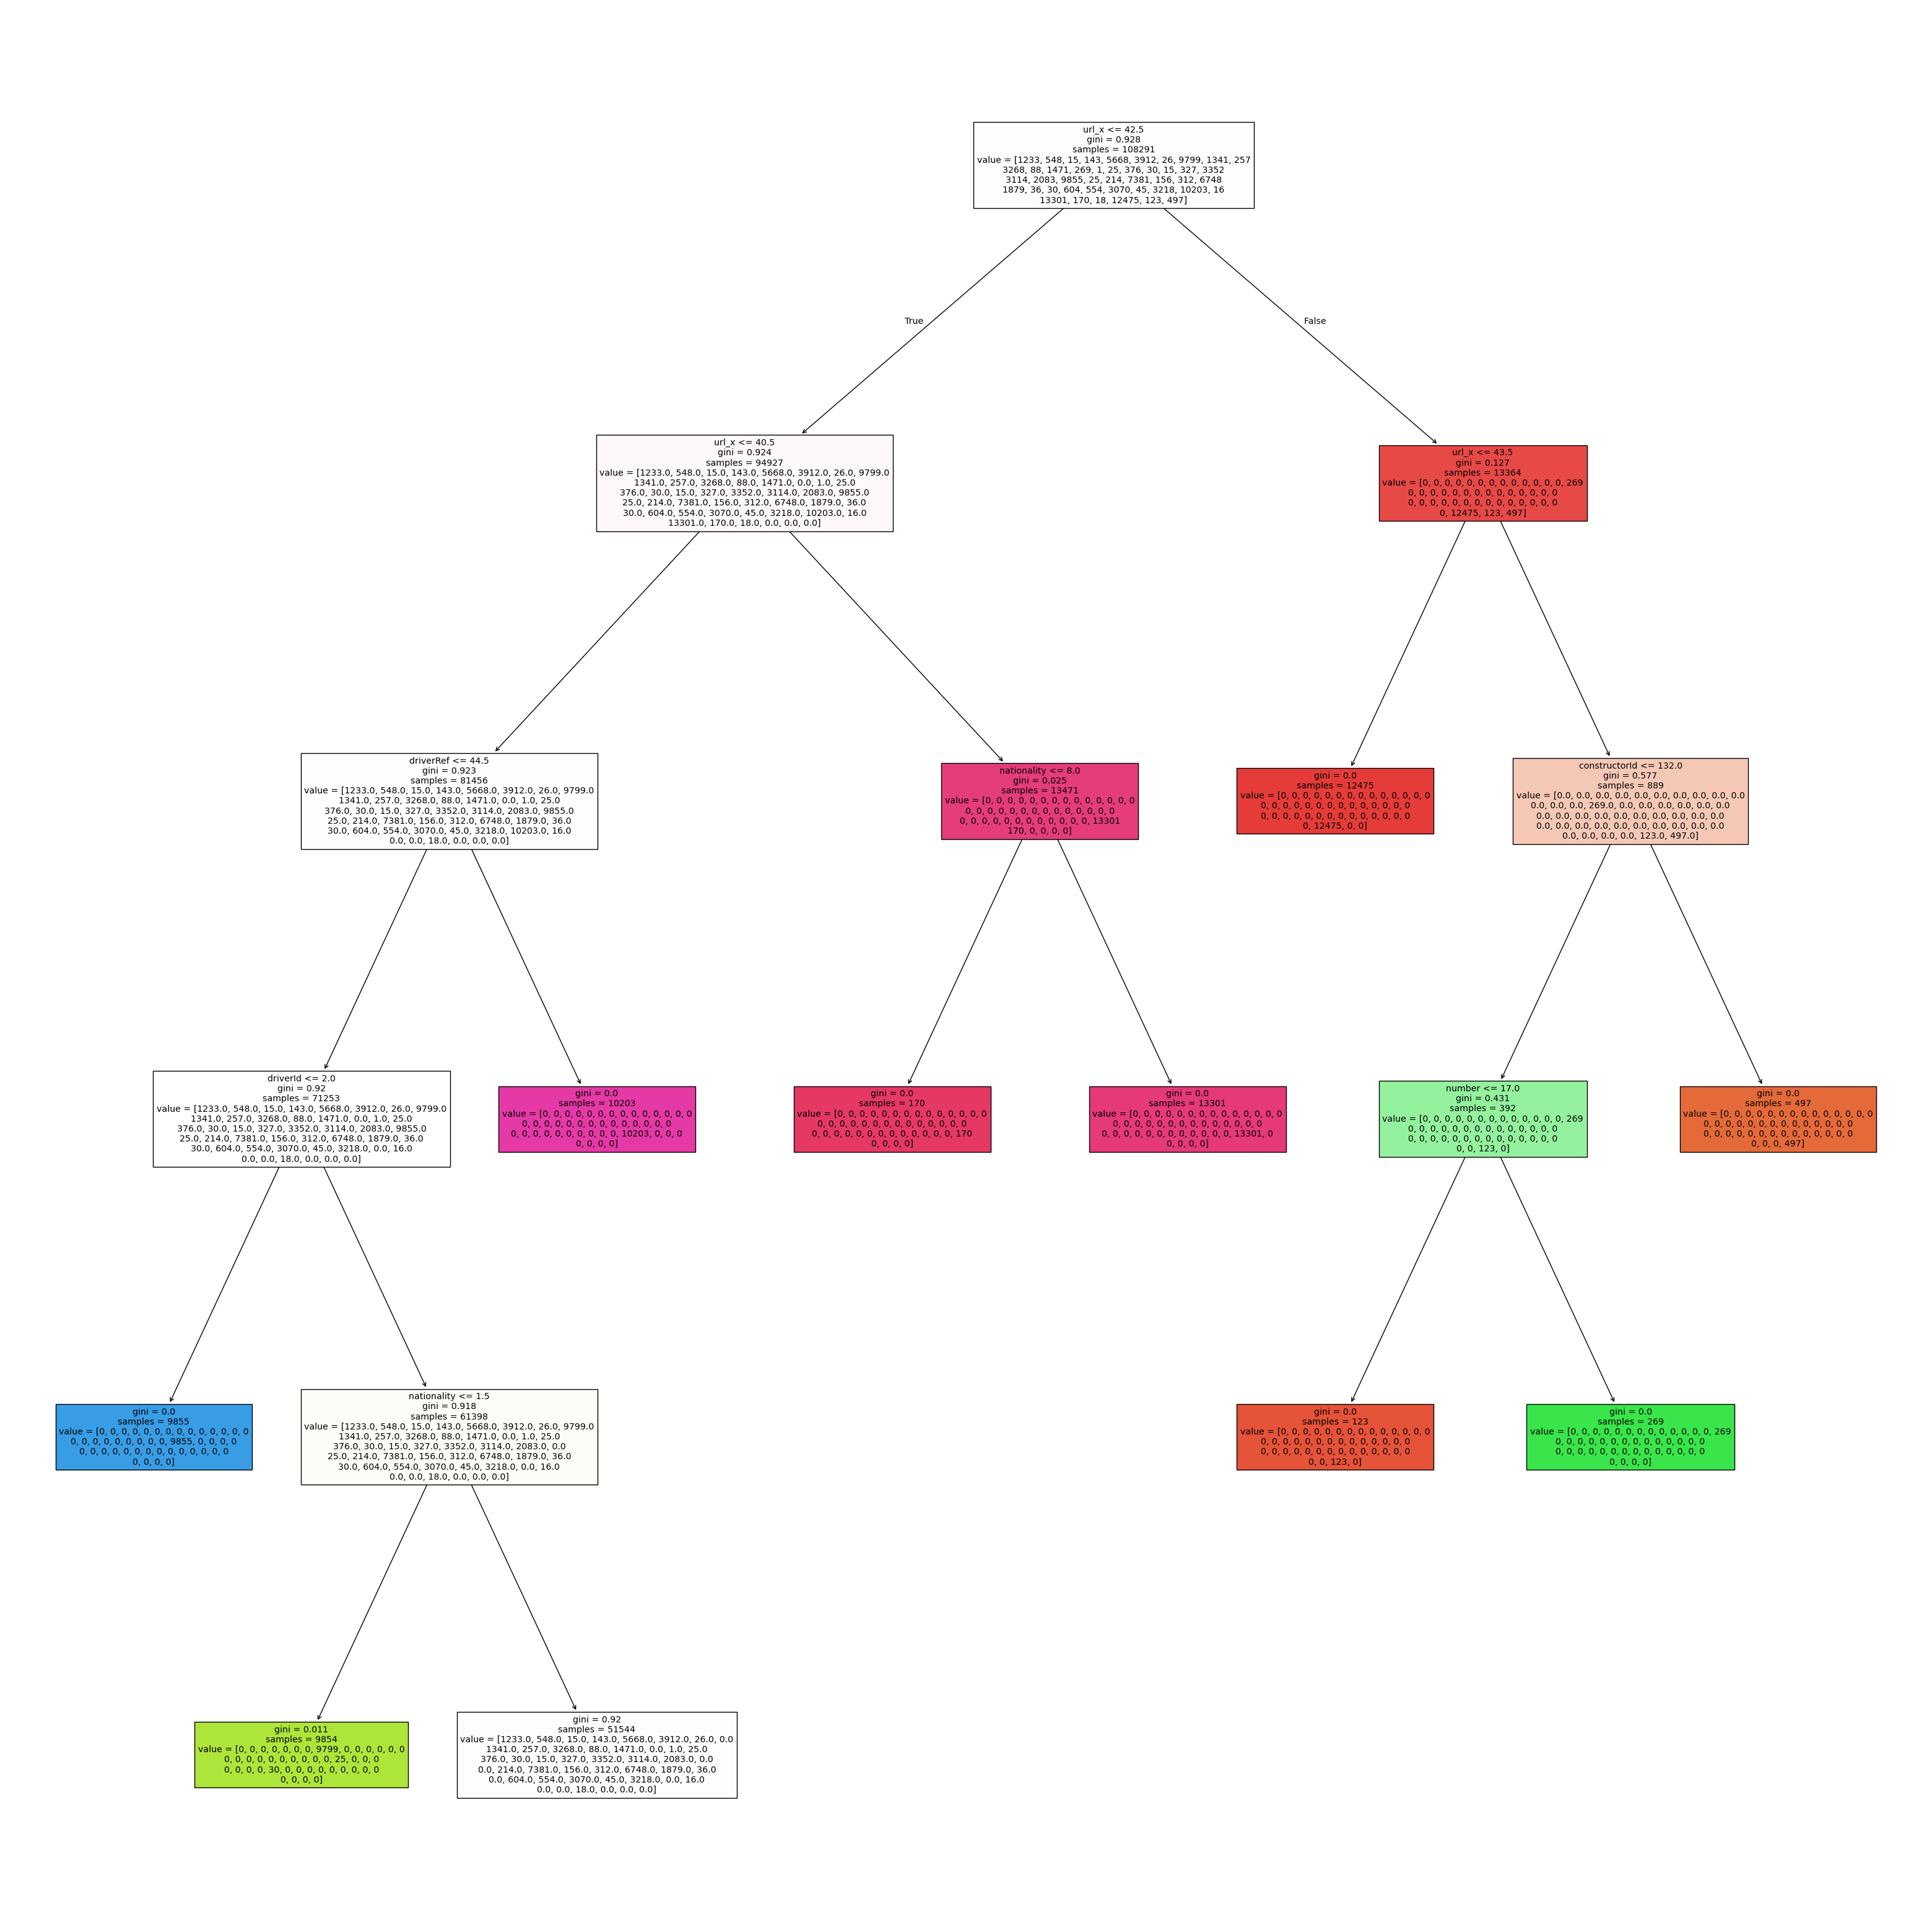

In [79]:
# plotting decision tree workflow

fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,
               feature_names=fn,
               filled=True)

# Modeling the data

In [80]:
pip install --upgrade numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [81]:
# classification ML algorithms

lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [93]:
import warnings
warnings.filterwarnings("ignore")
li = [lr,sgd,knn,gb,rn,dt]
d = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypred = i.predict(xtest)
    print(i,":",accuracy_score(ypred,ytest)*100)
    d.update({str(i):i.score(xtest,ytest)*100})


LogisticRegression(solver='sag') : 13.664863933119303
SGDClassifier() : 11.477882398569305
KNeighborsClassifier() : 99.91812285880502
GaussianNB() : 93.27099179073926
RandomForestClassifier() : 99.99569067677922
DecisionTreeClassifier() : 99.99569067677922


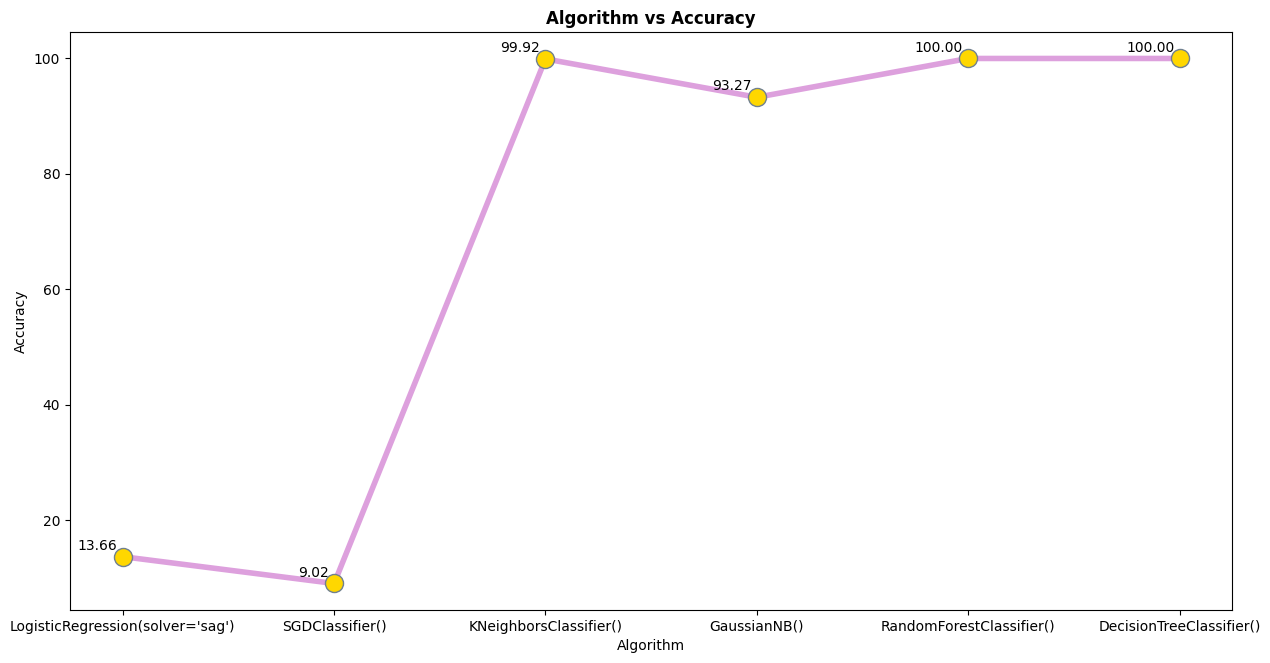

In [83]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='plum',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
for x,y in zip(d.keys(),d.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

As you can see, the accuracy of basic algorithm (logistic) and SGD is not good as expected. Since the data are skewed/denormalized, so it can be fixed by scaling the data.

# [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [84]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
# transform training data
X_train_norm = norm.transform(xtrain)
# transform testing data
X_test_norm = norm.transform(xtest)

In [85]:
li = [lr,sgd,rn,knn,gb,dt]
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest)*100)
    di.update({str(i):i.score(X_test_norm,ytest)*100})

LogisticRegression(solver='sag') : 99.9633707526233
SGDClassifier() : 98.64471784706213
RandomForestClassifier() : 99.99569067677922
KNeighborsClassifier() : 99.99138135355842
GaussianNB() : 99.99569067677922
DecisionTreeClassifier() : 99.99569067677922


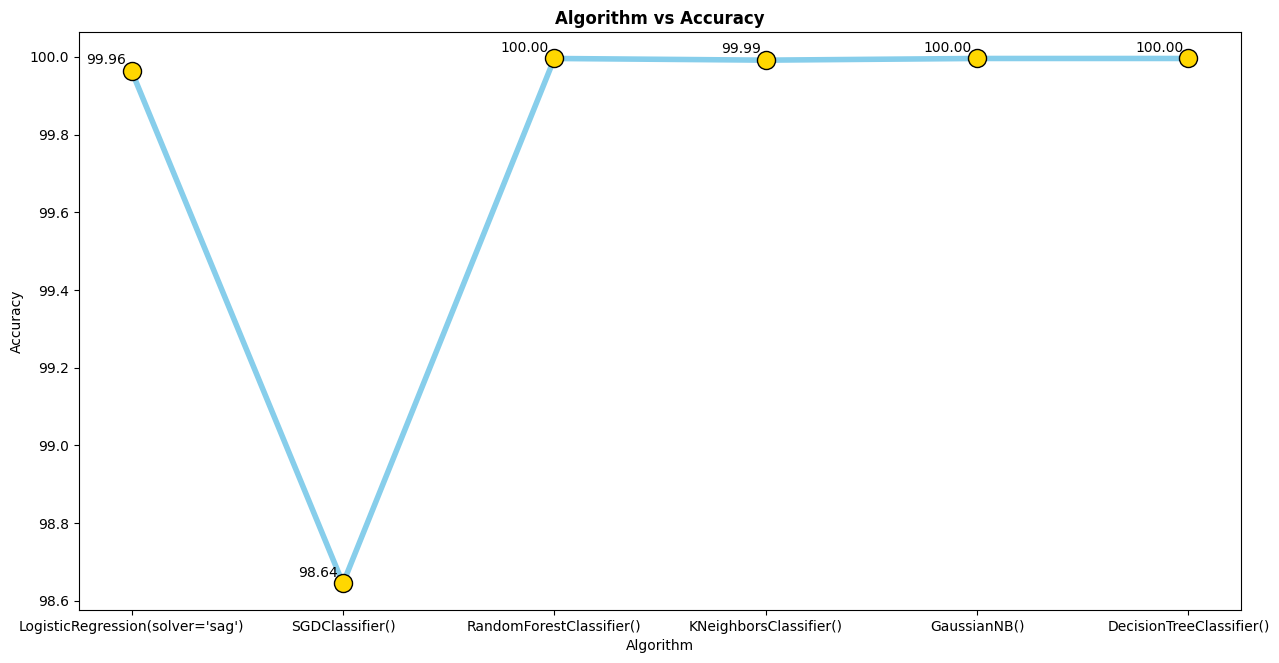

In [86]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='skyblue',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(di.keys(),di.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

As you can see the accuracy are getting high for Logistic Regression and SGDClassifier, both the algorithms are performing well from bottom low to 99% accuracy by scaling. Hence this prove the importance of normalizing the data.

# [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [87]:
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
std = StandardScaler().fit(xtrain)
# transform train data
x_train_std = std.transform(xtrain)
# transform test data
x_test_std = std.transform(xtest)

In [88]:
li = [lr,sgd,rn,knn,gb,dt]
dic = {}
for i in li:
    i.fit(x_train_std,ytrain)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dic.update({str(i):i.score(x_test_std,ytest)*100})

LogisticRegression(solver='sag') : 99.99569067677922
SGDClassifier() : 98.87957596259508
RandomForestClassifier() : 99.99569067677922
KNeighborsClassifier() : 99.99353601516881
GaussianNB() : 99.99569067677922
DecisionTreeClassifier() : 99.99569067677922


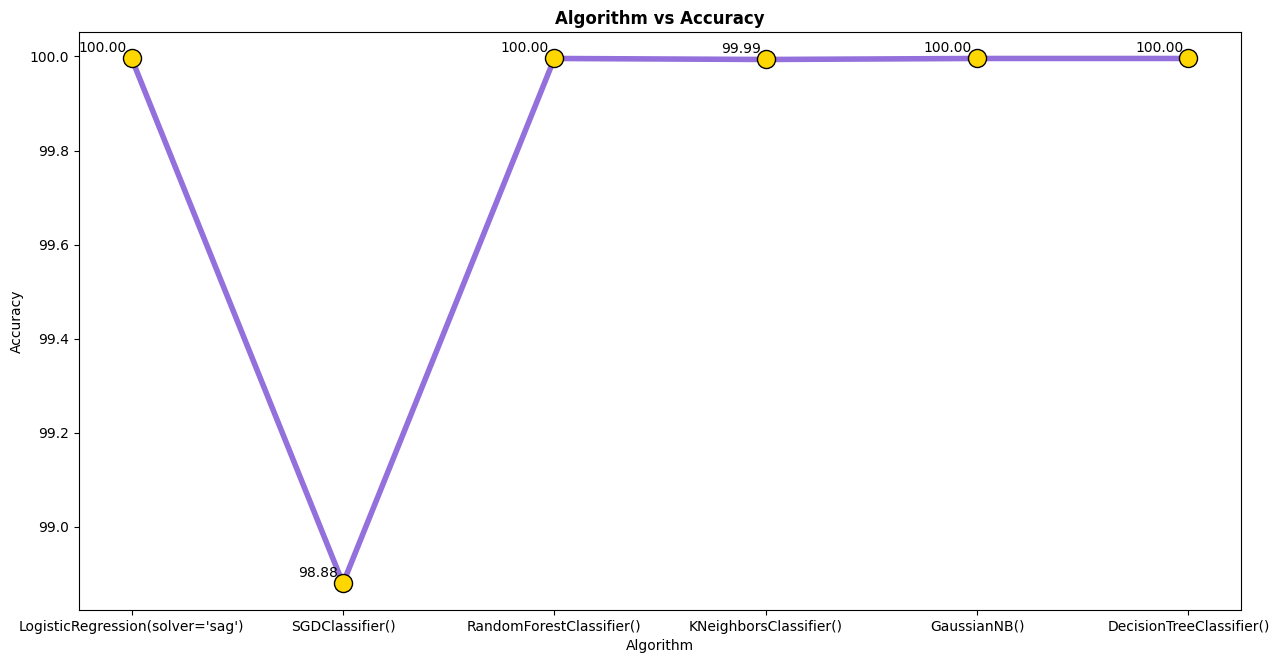

In [89]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(dic.keys(),dic.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

# [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

In [90]:
from sklearn.preprocessing import RobustScaler
# fit scaler on train data
scaler = RobustScaler().fit(xtrain)
# transform train data
xtrain_scaled = scaler.transform(xtrain)
# transform test data
xtest_scaled = scaler.transform(xtest)

In [91]:
li = [lr,sgd,rn,knn,gb,dt]
dics = {}
for i in li:
    i.fit(xtrain_scaled,ytrain)
    ypred = i.predict(xtest_scaled)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dics.update({str(i):i.score(xtest_scaled,ytest)*100})

LogisticRegression(solver='sag') : 99.99138135355842
SGDClassifier() : 98.99808235116674
RandomForestClassifier() : 99.99569067677922
KNeighborsClassifier() : 99.99353601516881
GaussianNB() : 99.99569067677922
DecisionTreeClassifier() : 99.99569067677922


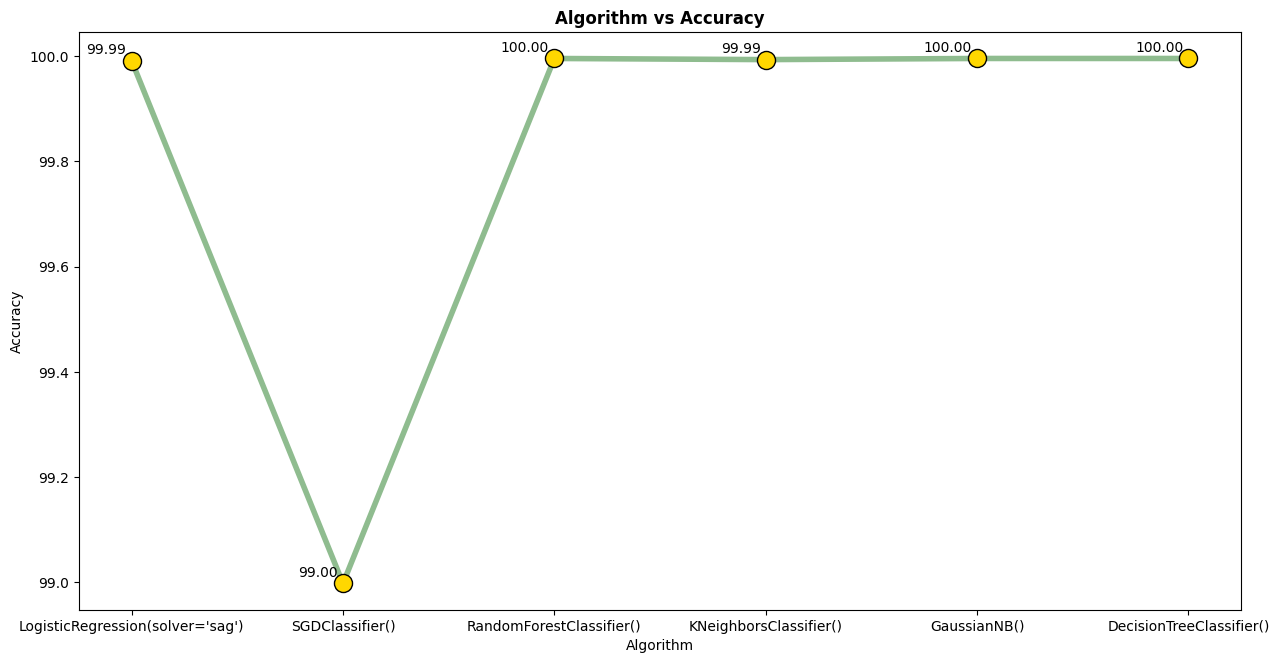

In [92]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dics.keys(),dics.values(),marker='o',color='darkseagreen',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(dics.keys(),dics.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

After several stages of scaling process, got a good accuracy score of 100% in all algorithms except SGDClassifier with least of 99% for StandardScaler. Even the least (SGDClassifier) is considered as a very good accuracy.

We made it team, we made it! 🎉

![podium](https://c.tenor.com/agI-d6PVLeIAAAAC/sebastian-vettel.gif)

# Thank you!
# Parvash